In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive

MessageError: Error: credential propagation was unsuccessful

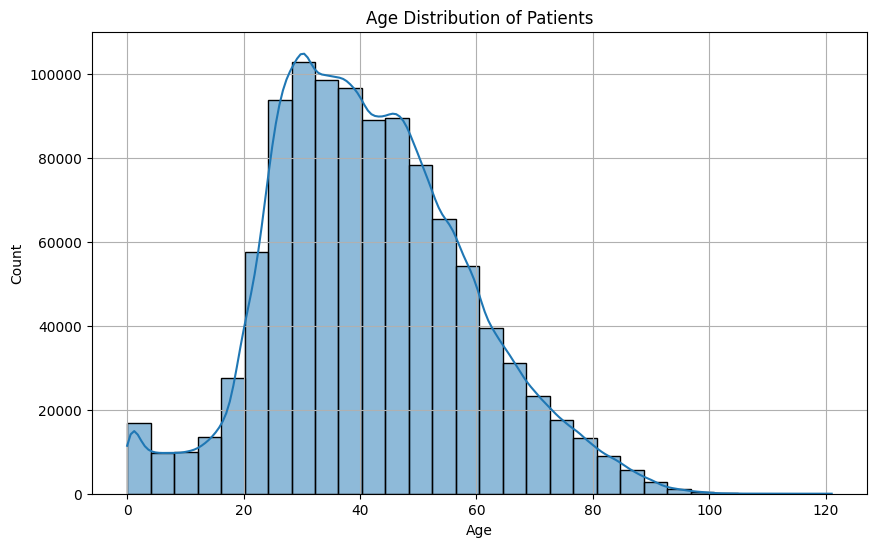

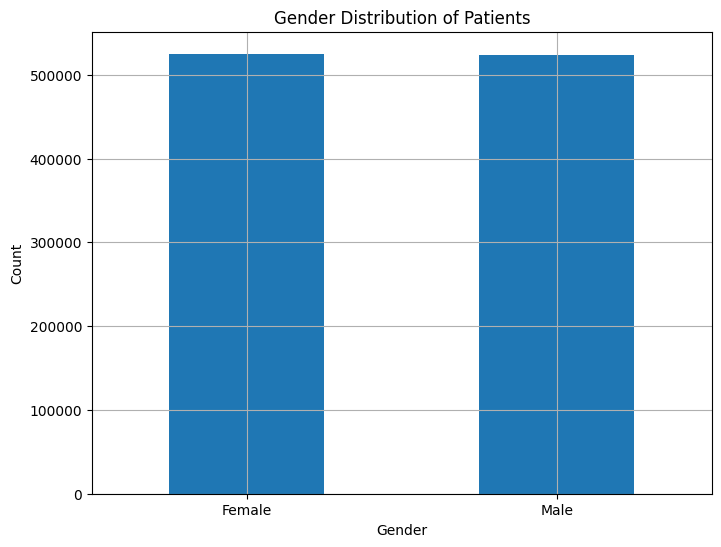

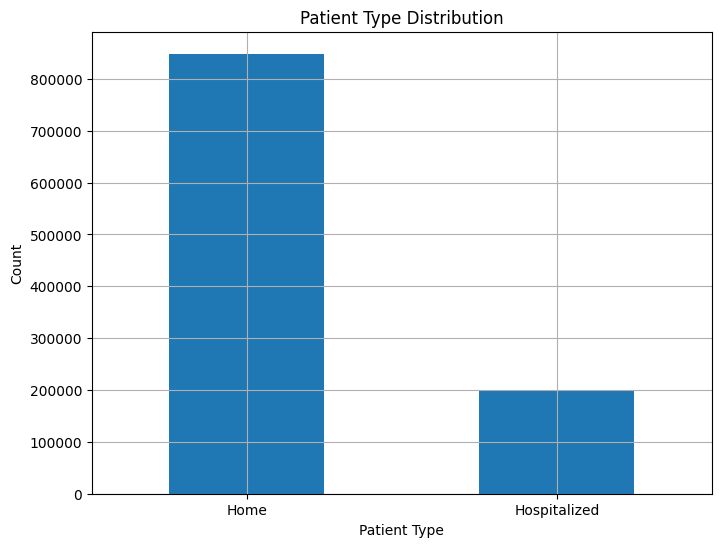

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('Covid Data.csv')

# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['AGE'], bins=30, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Gender distribution
plt.figure(figsize=(8, 6))
gender_counts = data['SEX'].value_counts().rename(index={1: 'Female', 2: 'Male'})
gender_counts.plot(kind='bar')
plt.title('Gender Distribution of Patients')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

# Patient type distribution
plt.figure(figsize=(8, 6))
patient_type_counts = data['PATIENT_TYPE'].value_counts().rename(index={1: 'Home', 2: 'Hospitalized'})
patient_type_counts.plot(kind='bar')
plt.title('Patient Type Distribution')
plt.xlabel('Patient Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

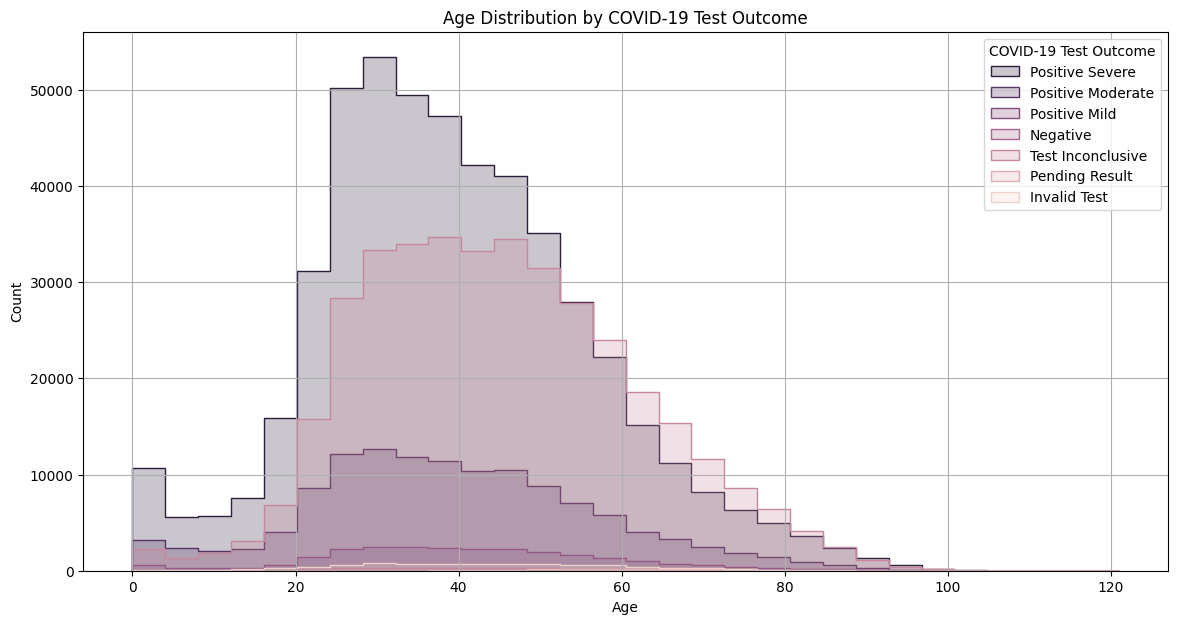

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame containing the dataset
plt.figure(figsize=(14, 7))
sns.histplot(data=data, x='AGE', hue='CLASIFFICATION_FINAL', element='step', bins=30)
plt.title('Age Distribution by COVID-19 Test Outcome')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='COVID-19 Test Outcome', labels=['Positive Severe', 'Positive Moderate', 'Positive Mild', 'Negative', 'Test Inconclusive', 'Pending Result', 'Invalid Test'])
plt.grid(True)
plt.show()


The age distribution of patients across different COVID-19 test outcomes shows a wide range of affected age groups. The data indicates that COVID-19 affects all ages.Also,most patients are concentrated between the ages of 30 and 50, but the impact and detection rates vary across different age groups. Notably, older age groups tend to have a higher proportion of severe COVID-19 test outcomes.

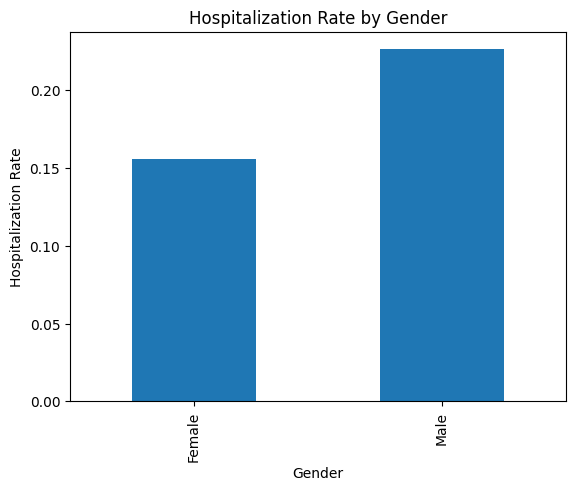

In [ ]:
hospitalized_gender_counts = data[data['PATIENT_TYPE'] == 2]['SEX'].value_counts().rename(index={1: 'Female', 2: 'Male'})
total_gender_counts = data['SEX'].value_counts().rename(index={1: 'Female', 2: 'Male'})
hospitalization_rate = hospitalized_gender_counts / total_gender_counts

hospitalization_rate.plot(kind='bar')
plt.title('Hospitalization Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Hospitalization Rate')
plt.show()

The analysis of gender distribution revealed:

Female: 15.6% hospitalization rate
Male: 22.6% hospitalization rate
Males have a higher rate of hospitalization compared to females. This difference suggests that males might be at a higher risk of severe illness or are more likely to seek hospital care when infected with COVID-19.

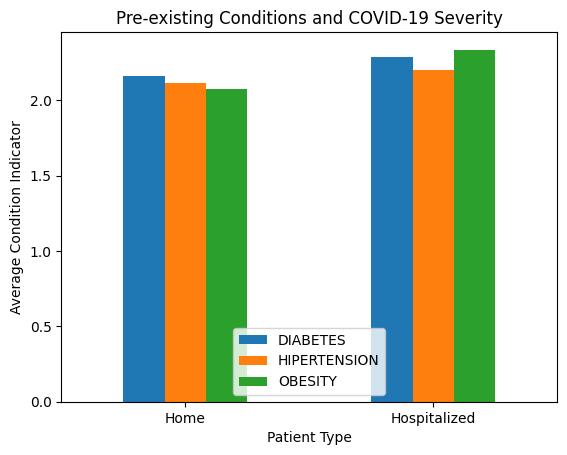

In [ ]:
conditions = ['DIABETES', 'HIPERTENSION', 'OBESITY']
condition_severity = data.groupby('PATIENT_TYPE')[conditions].mean()

condition_severity.plot(kind='bar')
plt.title('Pre-existing Conditions and COVID-19 Severity')
plt.xlabel('Patient Type')
plt.ylabel('Average Condition Indicator')
plt.xticks(ticks=[0, 1], labels=['Home', 'Hospitalized'], rotation=0)
plt.show()

3. Pre-existing Conditions and COVID-19 Severity

Patients with pre-existing conditions such as diabetes, hypertension, and obesity are more likely to have severe outcomes when infected with COVID-19. Hospitalized patients showed higher prevalence rates of these conditions compared to non-hospitalized patients, indicating a correlation between these comorbidities and COVID-19 severity.

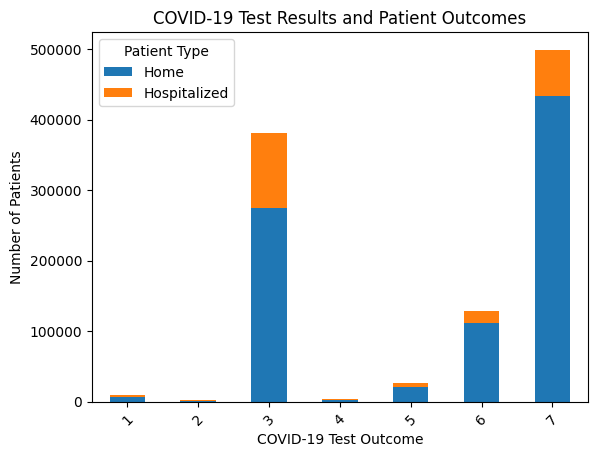

In [ ]:
covid_outcomes = data.groupby('CLASIFFICATION_FINAL')['PATIENT_TYPE'].value_counts().unstack().fillna(0)

covid_outcomes.plot(kind='bar', stacked=True)
plt.title('COVID-19 Test Results and Patient Outcomes')
plt.xlabel('COVID-19 Test Outcome')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.legend(title='Patient Type', labels=['Home', 'Hospitalized'])
plt.show()

4. COVID-19 Test Results and Patient Outcomes

The distribution of COVID-19 test results shows a significant number of both positive and negative outcomes. Patients with severe positive test results (indicative of COVID-19 infection) had a higher likelihood of hospitalization. Even among those with mild positive results, a substantial number required hospitalization, highlighting the unpredictable nature of the disease